In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


### Which store has maximum sales

In [3]:
# data = df[['Store', 'Weekly_Sales']].groupby('Store').sum().sort_values(['Weekly_Sales'], ascending=False)
# data.iloc[0:1]
data = df.groupby('Store')['Weekly_Sales'].sum()
print(data.max())

301397792.46000004


### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [4]:
data.std()

78167556.49249025

### Mean of Sales

In [5]:
data.mean()

149715977.49133337

### Which store/s has good quarterly growth rate in Q3’2012

In [6]:
df['Year'] = df['Date'].dt.year

In [7]:
def quarterData(month):
    if month <= 3:
        return 'Q1'
    elif month > 3 and month <= 6:
        return 'Q2'
    elif month > 6 and month <= 9:
        return 'Q3'
    else:
        return 'Q4'
    
df['Quarter'] = df['Date'].dt.month.apply(quarterData)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Q2


In [8]:
quarter_value = df[(df['Quarter'] == 'Q3') & (df['Year'] == 2012)].groupby('Store')['Weekly_Sales'].sum()

In [9]:
print("Store {} has good quarterly growth rate in Q3-2012 {}".format(quarter_value.idxmax(),quarter_value.max()))

Store 4 has good quarterly growth rate in Q3-2012 25652119.35


### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [10]:
total = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
print('Total Value is ' + str(total))

mean_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
print('Mean Value for non holiday ' + str(mean_non_holiday))

Total Value is 505299551.56
Mean Value for non holiday 1041256.3802088564


In [11]:
df[(df['Holiday_Flag'] == 1) & (df['Weekly_Sales'] > mean_non_holiday)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Q4
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,Q4
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,Q4
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,Q4
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,Q4
...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011,Q4
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,2012,Q4
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,2012,Q3
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010,Q4


### Provide a monthly and semester view of sales in units and give insights

#### Monthly View

In [12]:
df['Month'] = df['Date'].dt.month
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Q2,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Q4,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Q1,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Q1,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Q2,5


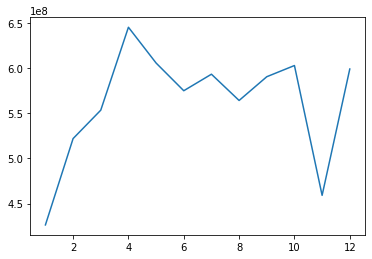

In [13]:
monthly_view_data = df[['Month', 'Weekly_Sales']].groupby(['Month']).sum()
plt.plot(monthly_view_data)
plt.show()

#### Semester View

In [14]:
# df.dtypes

In [15]:
# date = pd.to_datetime('2010-05-02')
# def semisterData(date):
#     date = date.strftime('%Y/%m')

# semisterData(date)

## For Store 1 – Build  prediction models to forecast demand

#### 1. Linear Regression :– Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales. <br> 2. Change dates into days by creating new variable.

### Select the model which gives best accuracy.

In [16]:
store1 = df[df['Store'] == 1]
store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Q2,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Q4,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Q1,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Q1,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Q2,5


In [17]:
store1 = store1.drop(['Date', 'Temperature', 'Holiday_Flag', 'Year', 'Quarter', 'Month'], axis=1)
# print(store1)

In [18]:
x_data = store1.drop(['Store', 'Weekly_Sales'], axis=1)
# store1
x_data.head()

,Fuel_Price,CPI,Unemployment
0,2.572,211.096358,8.106
1,2.548,211.242170,8.106
2,2.514,211.289143,8.106
3,2.561,211.319643,8.106
4,2.625,211.350143,8.106


In [29]:
import statsmodels.api as sm
X = sm.add_constant(x_data)

In [31]:
X.head()

,const,Fuel_Price,CPI,Unemployment
0,1.0,2.572,211.096358,8.106
1,1.0,2.548,211.242170,8.106
2,1.0,2.514,211.289143,8.106
3,1.0,2.561,211.319643,8.106
4,1.0,2.625,211.350143,8.106


##### Train Model

In [32]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [45]:
train_X, test_X, train_y, test_y = train_test_split(x_data, store1['Weekly_Sales'])

In [34]:
# train_test_split(X, store1['Weekly_Sales'])
train_X

,const,Fuel_Price,CPI,Unemployment
47,1.0,2.943,211.404932,7.838
61,1.0,3.622,215.074394,7.682
106,1.0,3.510,220.425759,7.348
85,1.0,3.467,216.375825,7.962
81,1.0,3.523,215.733226,7.962
...,...,...,...,...
129,1.0,3.407,221.941295,6.908
71,1.0,3.637,214.998060,7.682
94,1.0,3.236,218.467621,7.866
86,1.0,3.355,216.710596,7.962


In [46]:
train_X.shape, test_X.shape

((107, 3), (36, 3))

##### Build the model on training data

In [47]:
store1_data = sm.OLS(train_y,train_X.astype(float)).fit()
store1_data.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.992     
Dependent Variable:     Weekly_Sales     AIC:                         2843.2055 
Date:                   2021-02-19 14:28 BIC:                         2851.2240 
No. Observations:       107              Log-Likelihood:              -1418.6   
Df Model:               3                F-statistic:                 4344.     
Df Residuals:           104              Prob (F-statistic):          4.34e-109 
R-squared (uncentered): 0.992            Scale:                       1.9752e+10
---------------------------------------------------------------------------------
                   Coef.      Std.Err.      t     P>|t|      [0.025      0.975]  
---------------------------------------------------------------------------------
Fuel_Price      -14639.9821  41470.1095  -0.3530  0.7248  -96876.7655  67596.8013
CPI               7552.9092   1491.2786   5.0647  0.0000    4595.6478  10510.1706
Unemployment     -4416.7244  30527.1022  -0.1447  0.8852  -64953.1136  56119.6648
--------------------------------------------------------------------------------
Omnibus:                  58.502            Durbin-Watson:               1.917  
Prob(Omnibus):            0.000             Jarque-Bera (JB):            226.178
Skew:                     1.890             Prob(JB):                    0.000  
Kurtosis:                 9.037             Condition No.:               728    
================================================================================

"""

In [48]:
pred_y = store1_data.predict(test_X)

In [49]:
np.sqrt(metrics.mean_squared_error(pred_y,test_y))

184790.21929367492

In [51]:
test_X.iloc[:1,:].to_csv("New_data_for_Walmart.csv", index = False)

In [52]:
new_data = pd.read_csv("New_data_for_Walmart.csv")
print(new_data)

   Fuel_Price         CPI  Unemployment
0       2.886  211.405122         7.838


In [53]:
pred_y_new = store1_data.predict(new_data)

In [54]:
pred_y_new

0    1.519854e+06
dtype: float64

In [43]:
new_data["Predicted_WeeklySales"] = pred_y_new

In [44]:
pred_y_new.to_csv("Predicted Results of New Data.csv")

### 2nd Way

In [ ]:
x = store1.drop(['Store','Weekly_Sales'], axis=1)
x.head()

In [ ]:
y = store1['Weekly_Sales']
y.head()

In [ ]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(x,y)

In [ ]:
lin_reg.coef_

In [ ]:
lin_reg.intercept_

In [ ]:
train_data = lin_reg.predict(x)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,train_data)

#### Change dates into days by creating new variable.

In [ ]:
df['Days'] = df['Date'].dt.day_name()
df.head()